# Project Model B 
Desrciption of this model: Adding new variables to the model, (month, season, holiday, etc)

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [297]:
# Reading the file 
train = pd.read_csv('Hotel Reservations.csv')
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


**1. Adding seasons**

Spring runs from March 1 to May 31

Summer runs from June 1 to August 31

Fall runs from September 1 to November 30

Winter runs from December 1 to February 28 (February 29 in a leap year)

In [298]:
# Function to add seasons 
#Creating a function to bin age so that it can be applied to both the test and train datasets
def add_seasons(data):
    data['seasons'] = data['arrival_month'].apply(lambda x: 'spring' if (x == 3 or x ==4 or x ==5) 
                                                else ('winter' if (x == 12 or x ==1 or x ==2)
                                                      else ('summer' if (x == 6 or x ==7 or x == 8)
                                                            else 'fall')))
    return data

add_seasons(train)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,seasons,spring,summer,winter
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,fall,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,fall,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,winter,0,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,spring,1,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,spring,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,summer,0,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,fall,0,0,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,summer,0,1,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,spring,1,0,0


**2. Adding holidays**

New_years: December 31st *(guests arrive either 29, 30, 31 of dec)*

Christmas: December 25th   *(guests arrive either 23, 24, 25 of dec)*

Independence: July 4th *(guests arrive either 2, 3, 4 of july)*

Thanksgiving Day: November 23 2017 and November 22 2018


In [299]:
train['holiday'] = None

In [300]:
# Adding New Years 
new_years = train.loc[(train['arrival_month'] == 12) & ((train['arrival_date'] == 29) | (train['arrival_date'] == 30) | (train['arrival_date'] == 31))]
#print(new_years.index)

for ind in new_years.index:
    train.at[ind, 'holiday'] = 'new_year'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'new_year']
#check.shape

In [301]:
# Adding Christmas
christmas = train.loc[(train['arrival_month'] == 12) & ((train['arrival_date'] == 23) | (train['arrival_date'] == 24) | (train['arrival_date'] == 25))]
#print(christmas.index)

for ind in christmas.index:
    train.at[ind, 'holiday'] = 'christmas'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'christmas']
#check.shape

In [302]:
# Adding Independence Day
independence = train.loc[(train['arrival_month'] == 7) & ((train['arrival_date'] == 2) | (train['arrival_date'] == 3) | (train['arrival_date'] == 4))]
#print(independence.index)

for ind in independence.index:
    train.at[ind, 'holiday'] = 'independence'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'independence']
#check.shape

In [303]:
# Adding Thanksgiving day 
thanksgiving = train.loc[(train['arrival_month'] == 11) & ((train['arrival_date'] == 20) | (train['arrival_date'] == 21) | (train['arrival_date'] == 22) | (train['arrival_date'] == 23))]
#print(thanksgiving.index)

for ind in thanksgiving.index:
    train.at[ind, 'holiday'] = 'thanksgiving'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'thanksgiving']
#check.shape

**3. Creating training and testing dataframes based on years**

training data: includes months 7,8,9,10,11,12 of 2017, and 1,2,3,4,5,6,7 of 2018


testing data: includes months 8,9,10,11,12 of 2018

In [304]:
# Looking at the arrival year and arrival month, to split the data set
train.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

arrival_year  arrival_month
2017          7                 363
              11                647
              12                928
              8                1014
2018          1                1014
2017          9                1649
2018          2                1704
2017          10               1913
2018          12               2093
              11               2333
              3                2358
              7                2557
              5                2598
              4                2736
              8                2799
              9                2962
              6                3203
              10               3404
dtype: int64

In [305]:
new_train = train.loc[(train['arrival_month'] <= 7) | (train['arrival_year'] == 2017)]
test = train.loc[(train['arrival_month'] > 7) & (train['arrival_year'] == 2018)]

In [306]:
new_train.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

arrival_year  arrival_month
2017          7                 363
              11                647
              12                928
              8                1014
2018          1                1014
2017          9                1649
2018          2                1704
2017          10               1913
2018          3                2358
              7                2557
              5                2598
              4                2736
              6                3203
dtype: int64

In [307]:
test.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

arrival_year  arrival_month
2018          12               2093
              11               2333
              8                2799
              9                2962
              10               3404
dtype: int64

In [308]:
#train = new_train

**4. EDA**

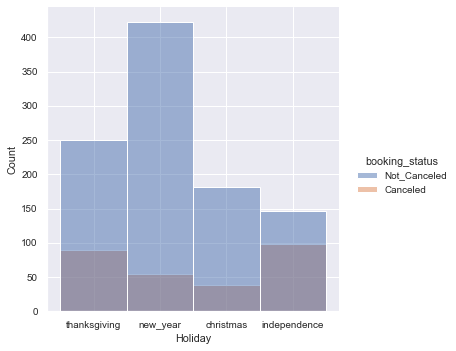

In [309]:
sns.set(font_scale = .9)
a = sns.displot(data = train, x = 'holiday',kind = 'hist', hue = 'booking_status')
a.set_axis_labels("Holiday", "Count")
a.set_titles("{col_name}")

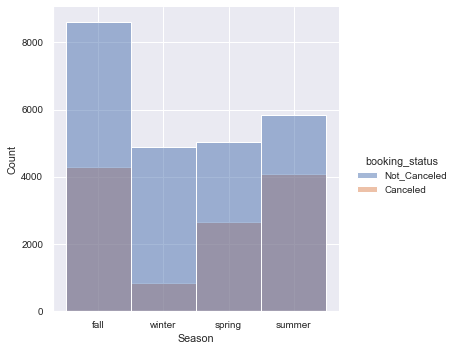

In [310]:
sns.set(font_scale = .9)
a = sns.displot(data = train, x = 'seasons',kind = 'hist', hue = 'booking_status')
a.set_axis_labels("Season", "Count")
a.set_titles("{col_name}")

**5. Model**

In [314]:
train['booking_status'] = train['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
#test['booking_status'] = test['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [312]:
train.corrwith(train.booking_status)

no_of_adults                            0.086920
no_of_children                          0.033078
no_of_weekend_nights                    0.061563
no_of_week_nights                       0.092996
required_car_parking_space             -0.086185
lead_time                               0.438538
arrival_year                            0.179529
arrival_month                          -0.011233
arrival_date                            0.010629
repeated_guest                         -0.107287
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
avg_price_per_room                      0.142569
no_of_special_requests                 -0.253070
booking_status                          1.000000
dtype: float64

In [313]:
# logit_model = sm.logit(formula = 'booking_status ~ seasons + holiday', data = train).fit()
# logit_model_3.summary()

In [316]:
# NOTES: 
# HAVE NOT SPLITTED THE DATA CORRECTLY... 
# NO NEED TO ADD DUMMY VARIABLES
# CAN YOU DO EDA ON TEST AND TRAIN TOGETHER? 